<a href="https://colab.research.google.com/github/pongsapaks/Detection-depression/blob/main/Fusion_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fusion Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
import os
import re
import glob

In [5]:
directory = "/content/drive/MyDrive/Final_DLP/data/"

In [6]:
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

TensorFlow 2.15.0
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 0 GPU(s):


In [7]:
#Read prediction result from Text and Audio model and Y true

text_prediction = pd.read_csv("/content/drive/MyDrive/Final_DLP/Text_pred_1.csv")

audio_prediction = pd.read_csv("/content/drive/MyDrive/Final_DLP/Audio_Pred.csv",index_col = 0)

Y_test = pd.read_csv("/content/drive/MyDrive/Final_DLP/y_true.csv")

In [8]:
# CombProduct method

text_model_pred = text_prediction.values  #convert to numpy array
audio_model_pred = audio_prediction.values  #convert to numpy array

combined_softmax_pred = text_model_pred * audio_model_pred  # Element-wise product of softmax predictions
combined_softmax_pred

array([[9.41519900e-01, 1.19006618e-21],
       [8.62050700e-01, 3.36130992e-21],
       [6.38678850e-01, 6.55743075e-21],
       [9.71949600e-01, 5.07344251e-22],
       [7.48685100e-01, 5.52015993e-21],
       [1.01750170e-01, 2.19959788e-20],
       [8.20386050e-01, 3.42908429e-21],
       [6.28416240e-01, 8.08996342e-21],
       [8.04843200e-01, 3.83350073e-21],
       [6.64981800e-01, 7.29446055e-21],
       [8.45212800e-01, 3.18908146e-21],
       [8.78749250e-01, 2.62929679e-21],
       [8.82705100e-01, 2.19429549e-21],
       [7.89128360e-01, 3.92608851e-21],
       [5.90634050e-01, 8.60242325e-21],
       [5.74205160e-01, 9.86787786e-21],
       [8.00979440e-01, 4.85431183e-21],
       [8.66998430e-01, 2.66882153e-21],
       [9.31361100e-01, 1.55467109e-21],
       [7.42258200e-01, 5.87469120e-21],
       [8.88815050e-01, 2.00160930e-21],
       [7.09147330e-01, 5.20568637e-21],
       [9.01843100e-01, 3.68760244e-21],
       [6.15613900e-01, 7.30103072e-21],
       [9.761383

In [11]:
argmax_txt = [np.argmax(x) for x in text_model_pred]
print(f'Text model prediction {argmax_txt}')

Text model prediction [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]


In [12]:
argmax_audio= [np.argmax(x) for x in audio_model_pred]
print(f'Audio model prediction: {argmax_audio}')

Audio model prediction: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
#Argmax of CombProduct

argmax_prd = [np.argmax(x) for x in combined_softmax_pred]
#final_prediction = np.argmax(combined_softmax_pred)  # Select the class with the highest combined probability

#print("Combined Softmax Predictions:", combined_softmax_pred)
print("Final Prediction:", argmax_prd)

Final Prediction: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
Y_true = Y_test.values  #convert to numpy array
Y_true.size

46

#Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,  ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
accuracy_score(Y_true, argmax_prd)

0.6956521739130435

In [ ]:
print(classification_report(Y_true, argmax_prd))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        32
           1       0.00      0.00      0.00        14

    accuracy                           0.70        46
   macro avg       0.35      0.50      0.41        46
weighted avg       0.48      0.70      0.57        46



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


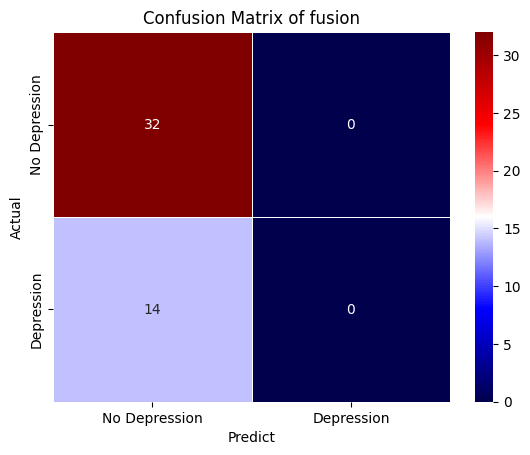

In [ ]:
y_true_label = ['No Depression' , 'Depression']
y_pred_label = ['No Depression' , 'Depression']
cm = confusion_matrix(Y_true, argmax_prd)
ax = sns.heatmap(cm, annot = True, cmap = 'seismic',xticklabels = y_pred_label, yticklabels = y_true_label, linewidth=.5, )
ax.set(xlabel='Predict',ylabel='Actual')
plt.title('Confusion Matrix of fusion')
plt.show()

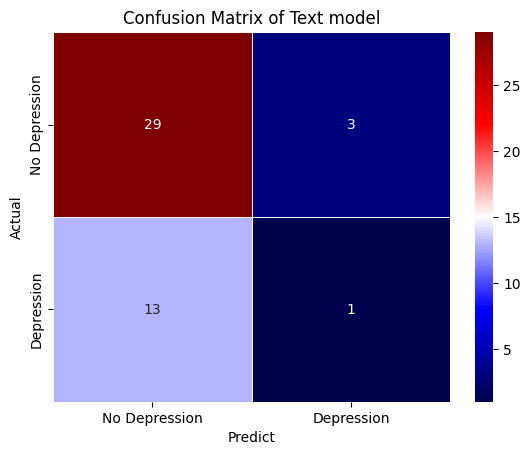

In [ ]:
y_true_label = ['No Depression' , 'Depression']
y_pred_label = ['No Depression' , 'Depression']
cm = confusion_matrix(Y_true, argmax_txt)
ax = sns.heatmap(cm, annot = True, cmap = 'seismic',xticklabels = y_pred_label, yticklabels = y_true_label, linewidth=.5, )
ax.set(xlabel='Predict',ylabel='Actual')
plt.title('Confusion Matrix of Text model')
plt.show()

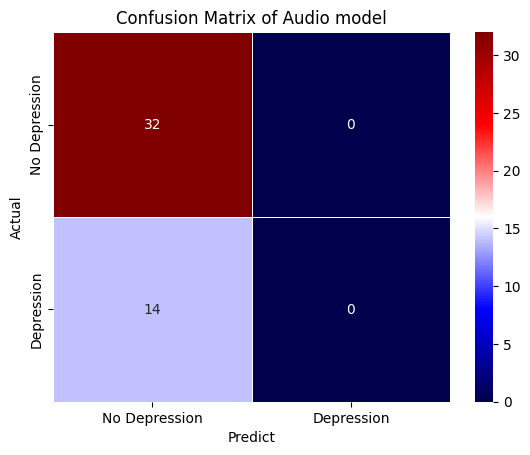

In [ ]:
y_true_label = ['No Depression' , 'Depression']
y_pred_label = ['No Depression' , 'Depression']
cm = confusion_matrix(Y_true, argmax_audio)
ax = sns.heatmap(cm, annot = True, cmap = 'seismic',xticklabels = y_pred_label, yticklabels = y_true_label, linewidth=.5, )
ax.set(xlabel='Predict',ylabel='Actual')
plt.title('Confusion Matrix of Audio model')
plt.show()